In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 16)

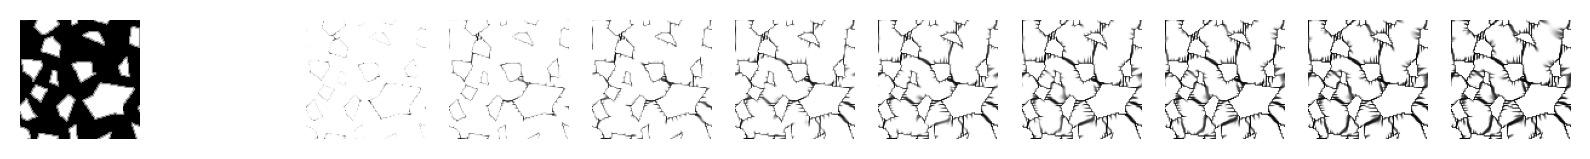

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [14]:
name = 'NN_library/AutoUnet/AutoUnet'
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [4]:
unet = AutoUNet()

In [5]:
torch.cuda.empty_cache() 

In [6]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [15]:
unet = load_network(unet, args['name']+'_19', args)

In [16]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  760.0360865503
Epoch: 0 batch: 100 mean train loss:  739.0323575464
Epoch: 0 batch: 200 mean train loss:  977.6762406453
Epoch: 0 batch: 300 mean train loss:  737.9902747422
Epoch: 0 batch: 400 mean train loss:  799.5601187017
Epoch: 0 batch: 500 mean train loss:  585.2902693397
Epoch: 0 batch: 600 mean train loss:  653.9369346541
Epoch: 0 batch: 700 mean train loss:  826.7046299044
Epoch: 0 mean train loss:  822.7245487062 mean val. rec. loss:  904.8452758789
Epoch: 1 batch: 0 mean train loss:  675.3121032830
Epoch: 1 batch: 100 mean train loss:  1000.5963215925
Epoch: 1 batch: 200 mean train loss:  760.2808312729
Epoch: 1 batch: 300 mean train loss:  651.1167435646
Epoch: 1 batch: 400 mean train loss:  766.5651969632
Epoch: 1 batch: 500 mean train loss:  977.1908159671
Epoch: 1 batch: 600 mean train loss:  592.0218868287
Epoch: 1 batch: 700 mean train loss:  837.0435326152
Epoch: 1 mean train loss:  822.1292878423 mean val. rec. loss:  902.05950927

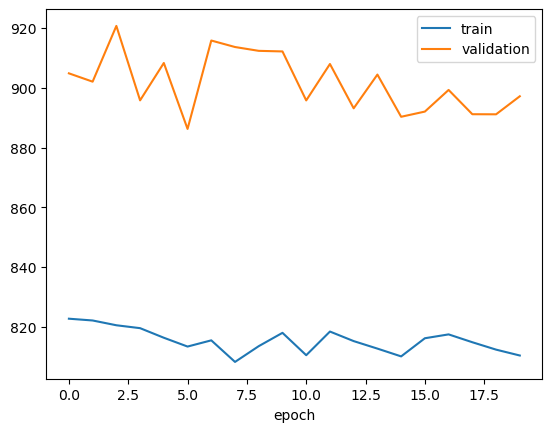

In [17]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## Train with Convnet

In [3]:
from NN_library.ConvNet.ConvNet import *

name = 'NN_library/AutoUnet/AutoUnet_w_Conv'

Using device: cuda


In [16]:
args = {'lr' : 0.0000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet()
convnet = ConvNet(16)

convnet = load_network(convnet, 'NN_library/ConvNet/ConvNet', args)

In [15]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_w_Conv_11', args)  

In [17]:
losses_train, losses_val = train_w_Conv(unet, convnet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  10.9064902856
Epoch: 0 batch: 100 mean train loss:  9.9501415810
Epoch: 0 batch: 200 mean train loss:  9.1307324401
Epoch: 0 batch: 300 mean train loss:  5.9331767400
Epoch: 0 batch: 400 mean train loss:  7.8751622398
Epoch: 0 batch: 500 mean train loss:  8.2745405817
Epoch: 0 batch: 600 mean train loss:  7.7473487103
Epoch: 0 batch: 700 mean train loss:  6.8336814860
Epoch: 0 mean train loss:  8.4259307763 mean val. rec. loss:  9.2792034149
Epoch: 1 batch: 0 mean train loss:  9.6524026160
Epoch: 1 batch: 100 mean train loss:  8.2554576522


KeyboardInterrupt: 

In [ ]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])